In [1]:
# generaly imports
import os
import numpy as np
import pandas as pd
from tifffile import imread
import matplotlib.pyplot as plt

In [2]:
# pytorch imports
import torch 
from torch import optim
import torch.nn.functional as F
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader

In [3]:
# custom imports
from utils.data import ImageTargetData, FlipHorizontal, FlipVertical, Normalize, ToTensor, get_datapoints
from utils.train_segment import train
from utils.tools import get_true_index, display_predicted_mask

In [4]:
# set data type and device
dtype = torch.float
ltype = torch.long

if torch.cuda.is_available():
    device = torch.device('cuda:0')
else:
    device = torch.device('cpu')

print('using device:', device)

using device: cuda:0


### Get Dataframe Of File Paths & Create Datasets

In [5]:
# list of tuples with folders for input and target
bone_crack = [
    ('../Sample3_step10', 
    '../Sample3_step10_crack'),
    ('../Sample2_p10', 
    '../Sample2_657_crack'),
    ('../Sample2_step12', 
    '../Sample2_step12_crack'),
    ('../Sample2_step8', 
    '../Sample2_step8_crack'),
    ('../Sample1_p10',
    '../Sample1_p10_crack'),
    ('../Sample1_p8',
    '../Sample1_p8_crack')
]

In [6]:
# set number of images to be read in as a sample
slab = 5

# get datapoints
d_train, d_val = get_datapoints(bone_crack, slab, 0.15)

# create datasets
data_train = ImageTargetData(d_train, transform=transforms.Compose([Normalize(), FlipHorizontal(), FlipVertical(), ToTensor()]))
data_val = ImageTargetData(d_val, transform=transforms.Compose([Normalize(), ToTensor()]))

# review dataset metrics
print(f'Training Data:   {len(data_train)} images')
print(f'Validation Data: {len(data_val)} images')

Training Data:   3127 images
Validation Data: 622 images


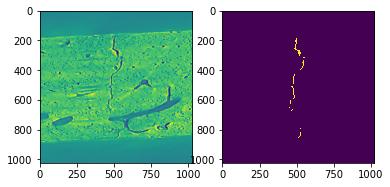

In [7]:
#check an image
img, msk = data_val[80]

fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].imshow(img[2])
ax[1].imshow(msk[0], interpolation='nearest')

In [8]:
# set display image
disp_x, disp_y = data_val[80]

disp_x = disp_x.unsqueeze(dim=0)
disp_y = disp_y.unsqueeze(dim=0)

display_input=(disp_x, disp_y)

### Define Data Loaders

In [9]:
batch_size=2
loader_train = DataLoader(data_train, batch_size=batch_size, shuffle=True)
loader_val = DataLoader(data_val, batch_size=batch_size, shuffle=False)

### Instantiate Model & Define Hyperparameters

In [10]:
from model.u_model import UModel_Segment

# set random seed for reproducibility
torch.manual_seed(123)

# instantiate model
model = UModel_Segment(channels=(slab, 32, 64, 128, 256, 512, 2))

# set hyperparameters
learning_rate = 1e-4
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
model = model.to(device=device)

### Train Model

Directory "results_210810_1840" Created


Starting Epoch: 1
Epoch: 1, Batch: 0300, Batch loss: 0.461826, Time: 0.03 hr
Epoch: 1, Batch: 0600, Batch loss: 0.402845, Time: 0.07 hr
Epoch: 1, Batch: 0900, Batch loss: 0.373764, Time: 0.1 hr
Epoch: 1, Batch: 1200, Batch loss: 0.363943, Time: 0.14 hr
Epoch: 1, Batch: 1500, Batch loss: 0.351741, Time: 0.17 hr
Epoch: 1, Training loss: 0.344371, Val loss: 0.344343, Time: 0.32 hr


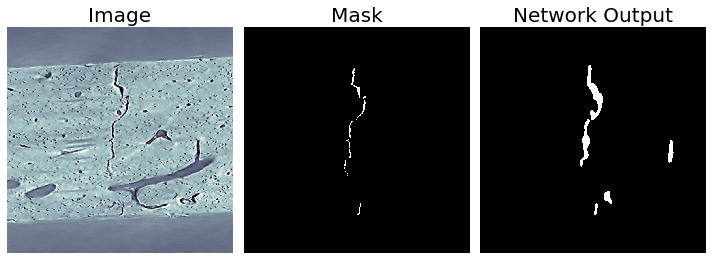


Starting Epoch: 2
Epoch: 2, Batch: 0300, Batch loss: 0.331696, Time: 0.36 hr
Epoch: 2, Batch: 0600, Batch loss: 0.33368, Time: 0.39 hr
Epoch: 2, Batch: 0900, Batch loss: 0.327745, Time: 0.42 hr
Epoch: 2, Batch: 1200, Batch loss: 0.333691, Time: 0.46 hr
Epoch: 2, Batch: 1500, Batch loss: 0.331257, Time: 0.49 hr
Epoch: 2, Training loss: 0.324199, Val loss: 0.324208, Time: 0.64 hr


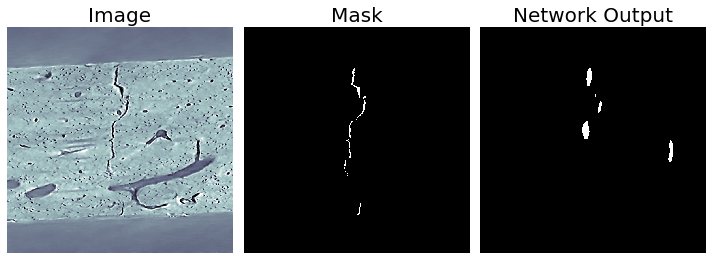


Starting Epoch: 3
Epoch: 3, Batch: 0300, Batch loss: 0.322975, Time: 0.68 hr
Epoch: 3, Batch: 0600, Batch loss: 0.322439, Time: 0.71 hr
Epoch: 3, Batch: 0900, Batch loss: 0.322626, Time: 0.75 hr
Epoch: 3, Batch: 1200, Batch loss: 0.320093, Time: 0.78 hr
Epoch: 3, Batch: 1500, Batch loss: 0.317337, Time: 0.81 hr
Epoch: 3, Training loss: 0.318016, Val loss: 0.318054, Time: 0.97 hr


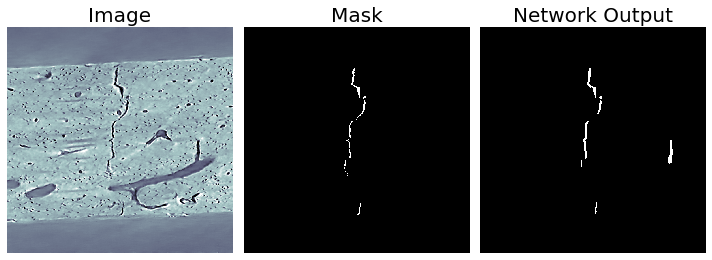


Starting Epoch: 4
Epoch: 4, Batch: 0300, Batch loss: 0.31595, Time: 1.0 hr
Epoch: 4, Batch: 0600, Batch loss: 0.316872, Time: 1.03 hr
Epoch: 4, Batch: 0900, Batch loss: 0.315798, Time: 1.07 hr
Epoch: 4, Batch: 1200, Batch loss: 0.317398, Time: 1.1 hr
Epoch: 4, Batch: 1500, Batch loss: 0.316166, Time: 1.14 hr
Epoch: 4, Training loss: 0.316109, Val loss: 0.316174, Time: 1.29 hr


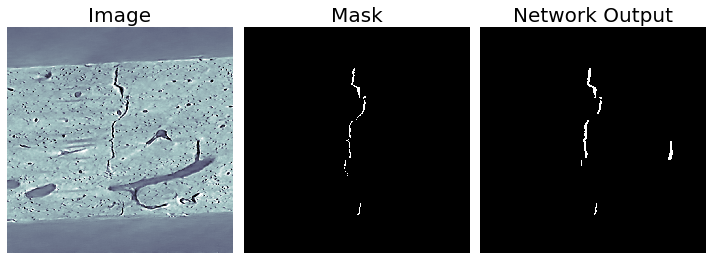


Starting Epoch: 5
Epoch: 5, Batch: 0300, Batch loss: 0.315118, Time: 1.32 hr
Epoch: 5, Batch: 0600, Batch loss: 0.314794, Time: 1.36 hr
Epoch: 5, Batch: 0900, Batch loss: 0.316904, Time: 1.39 hr
Epoch: 5, Batch: 1200, Batch loss: 0.314686, Time: 1.43 hr
Epoch: 5, Batch: 1500, Batch loss: 0.316104, Time: 1.46 hr
Epoch: 5, Training loss: 0.315504, Val loss: 0.315554, Time: 1.62 hr


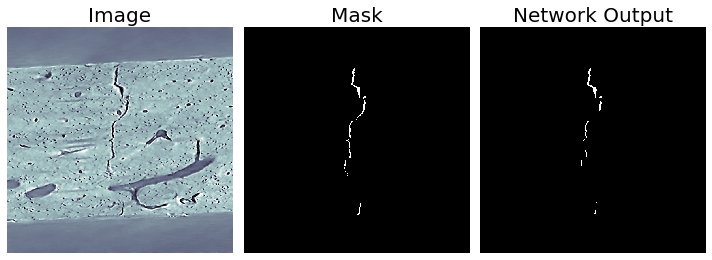


Starting Epoch: 6
Epoch: 6, Batch: 0300, Batch loss: 0.315396, Time: 1.65 hr
Epoch: 6, Batch: 0600, Batch loss: 0.315673, Time: 1.68 hr
Epoch: 6, Batch: 0900, Batch loss: 0.314271, Time: 1.72 hr
Epoch: 6, Batch: 1200, Batch loss: 0.314677, Time: 1.75 hr
Epoch: 6, Batch: 1500, Batch loss: 0.314728, Time: 1.79 hr
Epoch: 6, Training loss: 0.315513, Val loss: 0.31551, Time: 1.94 hr


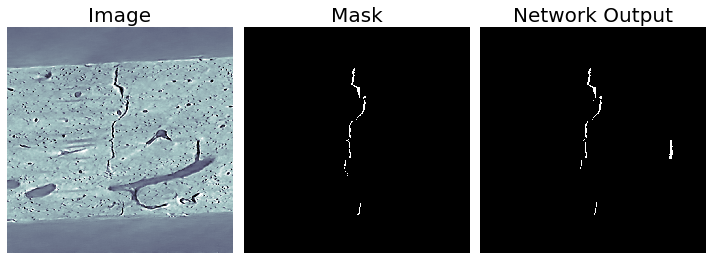


Starting Epoch: 7
Epoch: 7, Batch: 0300, Batch loss: 0.316889, Time: 1.97 hr
Epoch: 7, Batch: 0600, Batch loss: 0.316056, Time: 2.01 hr
Epoch: 7, Batch: 0900, Batch loss: 0.315379, Time: 2.04 hr
Epoch: 7, Batch: 1200, Batch loss: 0.313984, Time: 2.08 hr
Epoch: 7, Batch: 1500, Batch loss: 0.314147, Time: 2.11 hr
Epoch: 7, Training loss: 0.314721, Val loss: 0.314722, Time: 2.26 hr


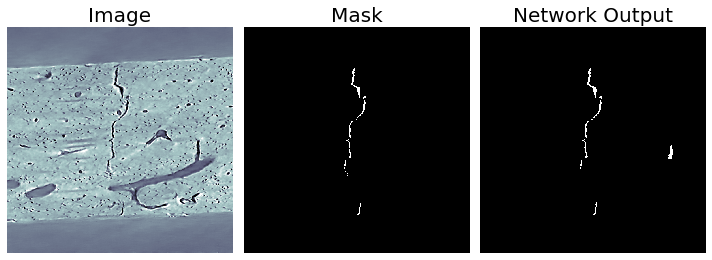


Starting Epoch: 8
Epoch: 8, Batch: 0300, Batch loss: 0.314889, Time: 2.3 hr
Epoch: 8, Batch: 0600, Batch loss: 0.321153, Time: 2.33 hr
Epoch: 8, Batch: 0900, Batch loss: 0.314387, Time: 2.36 hr
Epoch: 8, Batch: 1200, Batch loss: 0.315147, Time: 2.4 hr
Epoch: 8, Batch: 1500, Batch loss: 0.314469, Time: 2.43 hr
Epoch: 8, Training loss: 0.314594, Val loss: 0.314628, Time: 2.59 hr


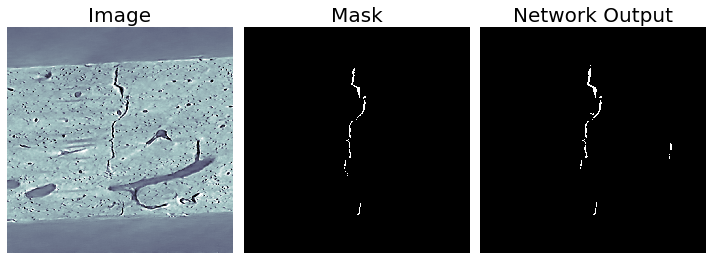


Starting Epoch: 9
Epoch: 9, Batch: 0300, Batch loss: 0.315716, Time: 2.62 hr
Epoch: 9, Batch: 0600, Batch loss: 0.313861, Time: 2.65 hr
Epoch: 9, Batch: 0900, Batch loss: 0.314275, Time: 2.69 hr
Epoch: 9, Batch: 1200, Batch loss: 0.314509, Time: 2.72 hr
Epoch: 9, Batch: 1500, Batch loss: 0.31551, Time: 2.75 hr
Epoch: 9, Training loss: 0.314792, Val loss: 0.314743, Time: 2.91 hr

Starting Epoch: 10
Epoch: 10, Batch: 0300, Batch loss: 0.314296, Time: 2.94 hr
Epoch: 10, Batch: 0600, Batch loss: 0.313658, Time: 2.98 hr
Epoch: 10, Batch: 0900, Batch loss: 0.313934, Time: 3.01 hr
Epoch: 10, Batch: 1200, Batch loss: 0.315883, Time: 3.04 hr
Epoch: 10, Batch: 1500, Batch loss: 0.314353, Time: 3.08 hr
Epoch: 10, Training loss: 0.314267, Val loss: 0.314274, Time: 3.23 hr


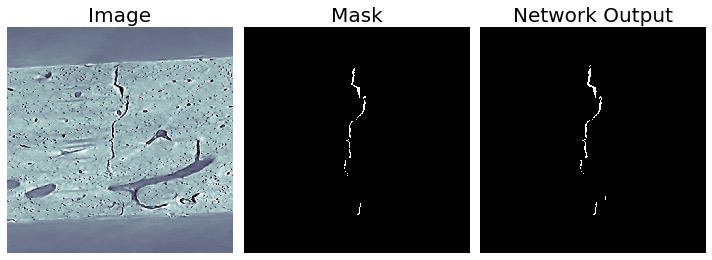

In [11]:
# set number of epochs
training_epochs=10

# train model
loss_train, loss_val = train(model, 
                             optimizer, 
                             loader_train, 
                             loader_val, 
                             epochs=training_epochs, 
                             print_every=300, 
                             device=device, 
                             dtype=dtype, 
                             ltype=ltype,
                             save_results=True,
                             display_input=display_input)

### Review Loss

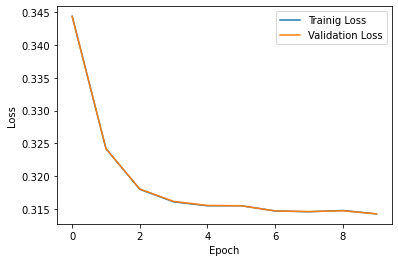

In [12]:
plt.plot(loss_train, label='Trainig Loss')
plt.plot(loss_val, label='Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# pd.DataFrame({'Training Loss': loss_train, 'Validation Loss': loss_val}).to_csv('results_210810_1840/loss.csv', index=False)

### Apply Network

In [11]:
checkpoint = torch.load('results_210810_1840/params_e0010.tar')
model.load_state_dict(checkpoint['model_state_dict'])

<All keys matched successfully>

In [12]:
# display_predicted_mask(model, loader_val, idx=None, device=device, dtype=dtype, ltype=ltype)

In [13]:
from utils.data import ImageDataApply, get_datapoints_apply, ToTensorApply, NormalizeApply, ToTensorApply
from utils.tools import apply_network_loader

In [14]:
dp_apply = get_datapoints_apply(['../Sample3'], slab=slab)
data_apply = ImageDataApply(dp_apply, transform=transforms.Compose([NormalizeApply(), ToTensorApply()]))
loader_apply = DataLoader(data_apply)

In [15]:
fldr_output = 'Sample3_crack'
apply_network_loader(model, loader_apply, fldr_output, device=device, dtype=dtype, segmentation=True)

Beginning Predictions
[100/610]
[200/610]
[300/610]
[400/610]
[500/610]
[600/610]
Complete!

